In [1]:
import pandas as pd
import numpy as np

# Load the Results table into a DataFrame
results_df = pd.read_csv('results.csv')  # Replace 'path/to/results.csv' with the actual path to your Results CSV file

# Assuming you have separate tables for Drivers and Constructors
drivers_df = pd.read_csv('drivers_org.csv')
constructors_df = pd.read_csv('constructors.csv')
status_df=pd.read_csv('status.csv')
lap_times_df= pd.read_csv('lap_times.csv')
pit_stops_df= pd.read_csv('pit_stops.csv')




In [2]:
# Remove the 'duration' from pit_stops and 'time' column from both datasets
pit_stops_df = pit_stops_df.drop(columns=['duration'])
lap_times_df = lap_times_df.drop(columns=['time'])
pit_stops_df = pit_stops_df.drop(columns=['time'])

#rename
lap_times_df = lap_times_df.rename(columns={'milliseconds': 'lap_duration'})
lap_times_df = lap_times_df.rename(columns={'lap': 'lap_laptimes'})
lap_times_df = lap_times_df.rename(columns={'position': 'position_laptimes'})
pit_stops_df = pit_stops_df.rename(columns={'milliseconds': 'pit_stop_duration'})
pit_stops_df = pit_stops_df.rename(columns={'lap': 'lap_pitstops'})




In [3]:
#Merge pit_stops and lap_times
race_details = pd.merge(lap_times_df, pit_stops_df, on=['raceId', 'driverId'], how='inner')

# Merge the Results DataFrame with the Drivers and Constructors DataFrames to get the driver and constructor information
results_df = pd.merge(results_df, drivers_df[['driverId', 'driverRef']], how='left', on='driverId')
results_df = pd.merge(results_df, constructors_df[['constructorId', 'name']], how='left', on='constructorId')
results_df = pd.merge(results_df,status_df[['statusId', 'status']], how='left', on='statusId')
results_df = pd.merge(results_df, race_details, on=['raceId', 'driverId'], how='inner')

# Rename the columns to reflect the changes
results_df = results_df.rename(columns={'driverRef': 'driverName', 'name': 'constructorName'})


# Save the modified DataFrame to a new CSV file
results_df.to_csv('results_with_names.csv', index=False)

In [4]:
resultDf=pd.read_csv('results_with_names.csv')

C:\Users\madhu\AppData\Local\Temp\ipykernel_11092\2448337740.py:1: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  resultDf=pd.read_csv('results_with_names.csv')


In [5]:
resultDf

resultId  raceId  driverId  constructorId  number  grid position  \
0          20779     841        20              9       1     1        1   
1          20779     841        20              9       1     1        1   
2          20779     841        20              9       1     1        1   
3          20779     841        20              9       1     1        1   
4          20779     841        20              9       1     1        1   
...          ...     ...       ...            ...     ...   ...      ...   
596908     26183    1115       858              3       2    15       \N   
596909     26183    1115       858              3       2    15       \N   
596910     26183    1115       858              3       2    15       \N   
596911     26183    1115       858              3       2    15       \N   
596912     26183    1115       858              3       2    15       \N   

       positionText  positionOrder  points  ...  statusId driverName  \
0                 1              1    25.0  ...         1     vettel   
1                 1              1    25.0  ...         1     vettel   
2                 1              1    25.0  ...         1     vettel   
3                 1              1    25.0  ...         1     vettel   
4                 1              1    25.0  ...         1     vettel   
...             ...            ...     ...  ...       ...        ...   
596908            R             18     0.0  ...       139   sargeant   
596909            R             18     0.0  ...       139   sargeant   
596910            R             18     0.0  ...       139   sargeant   
596911            R             18     0.0  ...       139   sargeant   
596912            R             18     0.0  ...       139   sargeant   

       constructorName    status  lap_laptimes position_laptimes lap_duration  \
0             Red Bull  Finished             1                 1        98109   
1             Red Bull  Finished             1                 1        98109   
2             Red Bull  Finished             2                 1        93006   
3             Red Bull  Finished             2                 1        93006   
4             Red Bull  Finished             3                 1        92713   
...                ...       ...           ...               ...          ...   
596908        Williams   Illness            38                18        88976   
596909        Williams   Illness            39                17        89587   
596910        Williams   Illness            39                17        89587   
596911        Williams   Illness            40                17       111661   
596912        Williams   Illness            40                17       111661   

        stop lap_pitstops pit_stop_duration  
0          1           14             22603  
1          2           36             24036  
2          1           14             22603  
3          2           36             24036  
4          1           14             22603  
...      ...          ...               ...  
596908     2           26             29373  
596909     1           13             29436  
596910     2           26             29373  
596911     1           13             29436  
596912     2           26             29373  

[596913 rows x 27 columns]

In [6]:
# Convert 'positionOrder' to binary (0s and 1s)
resultDf['positionOrder'] = results_df['positionOrder'].apply(lambda x: 1 if x == 1 else 0)

In [7]:
#Remove position, position text, time
resultDf = resultDf.drop(columns=['position','positionText','time'])

In [8]:
print(resultDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596913 entries, 0 to 596912
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   resultId           596913 non-null  int64  
 1   raceId             596913 non-null  int64  
 2   driverId           596913 non-null  int64  
 3   constructorId      596913 non-null  int64  
 4   number             596913 non-null  int64  
 5   grid               596913 non-null  int64  
 6   positionOrder      596913 non-null  int64  
 7   points             596913 non-null  float64
 8   laps               596913 non-null  int64  
 9   milliseconds       596913 non-null  object 
 10  fastestLap         596913 non-null  object 
 11  rank               596913 non-null  int64  
 12  fastestLapTime     596913 non-null  object 
 13  fastestLapSpeed    596913 non-null  object 
 14  statusId           596913 non-null  int64  
 15  driverName         596913 non-null  object 
 16  co

In [9]:
# Function to convert 'mm:ss.0' to milliseconds
def convert_to_milliseconds(time_str):
    if time_str == '\\N':
        return None  # or any other value that represents missing data
    else:
        minutes, seconds = map(float, time_str.split(':'))
        return int((minutes * 60 + seconds) * 1000)

# Apply the conversion function to the 'fastestLapTime' column
resultDf['fastestLapTime'] = resultDf['fastestLapTime'].apply(convert_to_milliseconds)

resultDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596913 entries, 0 to 596912
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   resultId           596913 non-null  int64  
 1   raceId             596913 non-null  int64  
 2   driverId           596913 non-null  int64  
 3   constructorId      596913 non-null  int64  
 4   number             596913 non-null  int64  
 5   grid               596913 non-null  int64  
 6   positionOrder      596913 non-null  int64  
 7   points             596913 non-null  float64
 8   laps               596913 non-null  int64  
 9   milliseconds       596913 non-null  object 
 10  fastestLap         596913 non-null  object 
 11  rank               596913 non-null  int64  
 12  fastestLapTime     596542 non-null  float64
 13  fastestLapSpeed    596913 non-null  object 
 14  statusId           596913 non-null  int64  
 15  driverName         596913 non-null  object 
 16  co

In [10]:
resultDf['fastestLapTime']

0         89844.0
1         89844.0
2         89844.0
3         89844.0
4         89844.0
           ...   
596908    87983.0
596909    87983.0
596910    87983.0
596911    87983.0
596912    87983.0
Name: fastestLapTime, Length: 596913, dtype: float64

In [11]:
resultDf.replace('\\N', np.nan, inplace=True)
resultDf.isnull().sum()


resultId                  0
raceId                    0
driverId                  0
constructorId             0
number                    0
grid                      0
positionOrder             0
points                    0
laps                      0
milliseconds         257898
fastestLap              371
rank                      0
fastestLapTime          371
fastestLapSpeed         371
statusId                  0
driverName                0
constructorName           0
status                    0
lap_laptimes              0
position_laptimes         0
lap_duration              0
stop                      0
lap_pitstops              0
pit_stop_duration         0
dtype: int64

In [12]:
resultDf = resultDf.dropna(subset=['fastestLap'])

In [13]:
resultDf.shape

(596542, 24)

In [14]:
resultDf['milliseconds'] = resultDf['milliseconds'].astype(float)
resultDf['points'] = resultDf['points'].astype(int)
resultDf['milliseconds'] = resultDf['milliseconds'].astype(float)
resultDf['fastestLap'] = resultDf['fastestLap'].astype(int)
resultDf['fastestLapSpeed'] = resultDf['fastestLapSpeed'].astype(float)
resultDf['positionOrder'] = resultDf['positionOrder'].astype(bool)

In [15]:
resultDf['milliseconds'].fillna(resultDf['milliseconds'].mean(), inplace=True)

In [16]:
resultDf.isnull().sum()

resultId             0
raceId               0
driverId             0
constructorId        0
number               0
grid                 0
positionOrder        0
points               0
laps                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverName           0
constructorName      0
status               0
lap_laptimes         0
position_laptimes    0
lap_duration         0
stop                 0
lap_pitstops         0
pit_stop_duration    0
dtype: int64

In [17]:
resultDf.duplicated().sum()

0

In [18]:
resultDf.describe()

resultId         raceId       driverId  constructorId  \
count  596542.000000  596542.000000  596542.000000  596542.000000   
mean    23365.438157     967.516661     529.165324      69.112309   
std      1622.565900      83.738015     388.975927      85.070969   
min     20779.000000     841.000000       1.000000       1.000000   
25%     21916.000000     890.000000      18.000000       5.000000   
50%     23210.000000     961.000000     816.000000      10.000000   
75%     24853.000000    1042.000000     832.000000     131.000000   
max     26183.000000    1115.000000     859.000000     214.000000   

              number           grid         points           laps  \
count  596542.000000  596542.000000  596542.000000  596542.000000   
mean       22.578787      10.787988       5.251000      60.005458   
std        22.075779       6.283582       7.289004       9.798782   
min         1.000000       0.000000       0.000000       2.000000   
25%         8.000000       5.000000       0.000000      54.000000   
50%        16.000000      11.000000       1.000000      58.000000   
75%        26.000000      16.000000      10.000000      69.000000   
max        99.000000      24.000000      50.000000      87.000000   

       milliseconds     fastestLap           rank  fastestLapTime  \
count  5.965420e+05  596542.000000  596542.000000   596542.000000   
mean   6.243545e+06      48.942177       9.882144    90143.734478   
std    1.050383e+06      12.253309       5.752565    12367.034050   
min    4.421143e+06       2.000000       1.000000    55404.000000   
25%    5.781925e+06      42.000000       5.000000    79657.000000   
50%    6.243545e+06      50.000000      10.000000    89498.000000   
75%    6.243545e+06      57.000000      15.000000   100128.000000   
max    1.474314e+07      85.000000      24.000000   176180.000000   

       fastestLapSpeed       statusId   lap_laptimes  position_laptimes  \
count    596542.000000  596542.000000  596542.000000      596542.000000   
mean        201.542702       7.096250      30.506648          10.309876   
std          20.134360      14.166339      18.221709           5.737944   
min         100.615000       1.000000       1.000000           1.000000   
25%         190.683000       1.000000      15.000000           5.000000   
50%         202.319000       1.000000      30.000000          10.000000   
75%         213.821000      11.000000      45.000000          15.000000   
max         255.014000     141.000000      87.000000          24.000000   

       lap_duration           stop   lap_pitstops  pit_stop_duration  
count  5.965420e+05  596542.000000  596542.000000       5.965420e+05  
mean   1.013978e+05       1.792248      26.348358       7.597842e+04  
std    1.207700e+05       0.951382      15.168742       2.885184e+05  
min    5.540400e+04       1.000000       1.000000       1.289700e+04  
25%    8.355300e+04       1.000000      14.000000       2.185600e+04  
50%    9.476000e+04       2.000000      26.000000       2.347900e+04  
75%    1.055830e+05       2.000000      37.000000       2.603100e+04  
max    7.507547e+06       7.000000      78.000000       3.069017e+06

In [19]:
features = ['driverId', 'constructorId', 'grid', 'laps', 'fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId','lap_laptimes',
'lap_duration','stop','lap_pitstops','pit_stop_duration']

In [20]:
#Feature scaling stored in tempDf
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
tempDF=resultDf
tempDF[features] = scaler.fit_transform(tempDF[features])

In [21]:
#Model Building Logistic Regression with feature scaling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['driverId', 'constructorId', 'grid', 'laps', 'fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId','lap_laptimes',
'lap_duration','stop','lap_pitstops','pit_stop_duration']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(tempDF[features], tempDF['positionOrder'], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9520237366837372


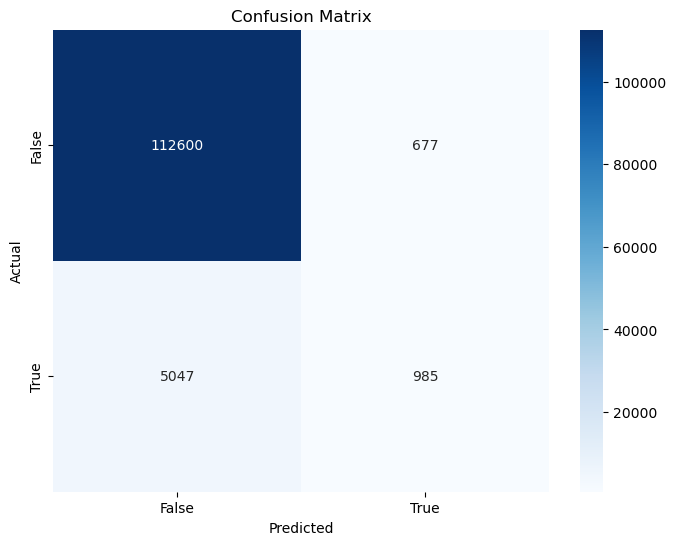

In [22]:
#Confusion matrix for Logistic regression with feature scaling
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
#Model Building Logistic regression without feature scaling and different set of features
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#features = ['driverId', 'constructorId', 'grid', 'laps', 'fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId','lap_laptimes',
#'lap_duration','stop','lap_pitstops','pit_stop_duration']

features = ['grid','laps', 'milliseconds', 'fastestLap','fastestLapTime','fastestLapSpeed','lap_laptimes','lap_duration','stop','lap_pitstops','pit_stop_duration']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(resultDf[features], resultDf['positionOrder'], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9494422046953709


In [24]:
#Model Building Gradient Boosting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the data
X_train, X_test, y_train, y_test = train_test_split(resultDf[features], resultDf['positionOrder'], test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()


# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9663143601907651


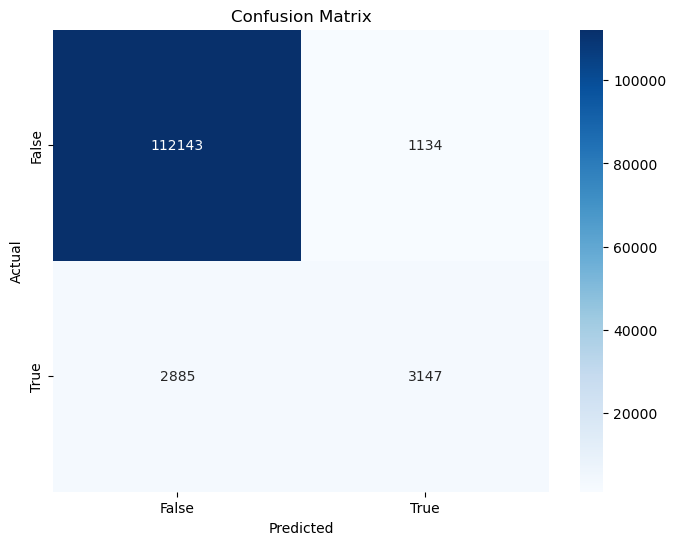

In [25]:
#Confusion matrix for gradient boosting
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
#Model Building Naive Bayes with different set of features
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['grid','laps', 'milliseconds', 'fastestLap','fastestLapTime','fastestLapSpeed','lap_laptimes','lap_duration','stop','lap_pitstops','pit_stop_duration']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(resultDf[features], resultDf['positionOrder'], test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.936157372872122


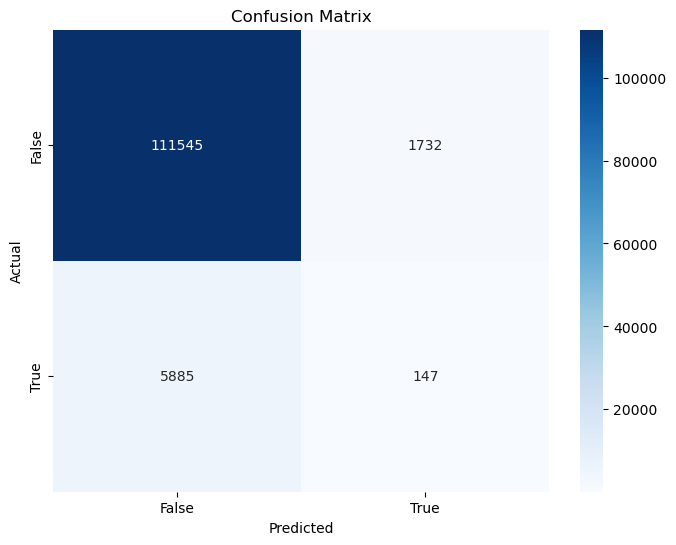

In [27]:
#Confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
resultDf.to_csv('final_data.csv', index=False)


Accuracy: 1.0
Feature Importances:
grid: 0.30936310625220925
laps: 0.030740785235592996
milliseconds: 0.18667327478422002
fastestLap: 0.08625262928711101
fastestLapTime: 0.18427785028805643
fastestLapSpeed: 0.13456410689518092
lap_laptimes: 0.0
lap_duration: 0.0
stop: 0.001971191318470394
lap_pitstops: 0.01412758306268395
pit_stop_duration: 0.05202947287647502


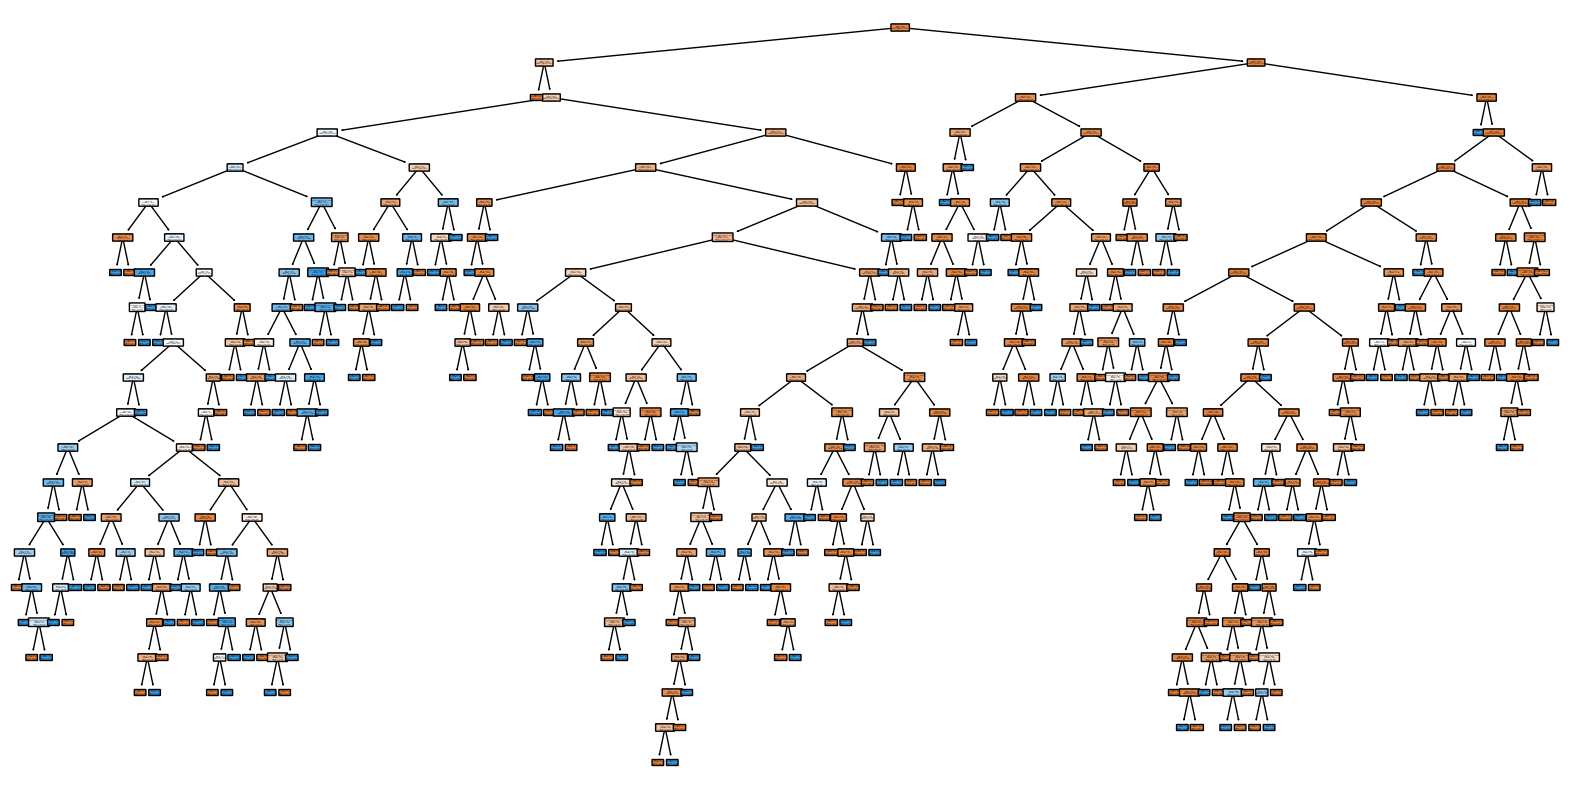

In [29]:
# Model Building Decision tree 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the data
X_train, X_test, y_train, y_test = train_test_split(resultDf[features], resultDf['positionOrder'], test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Print feature importances
feature_importances = model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")
    
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.show()


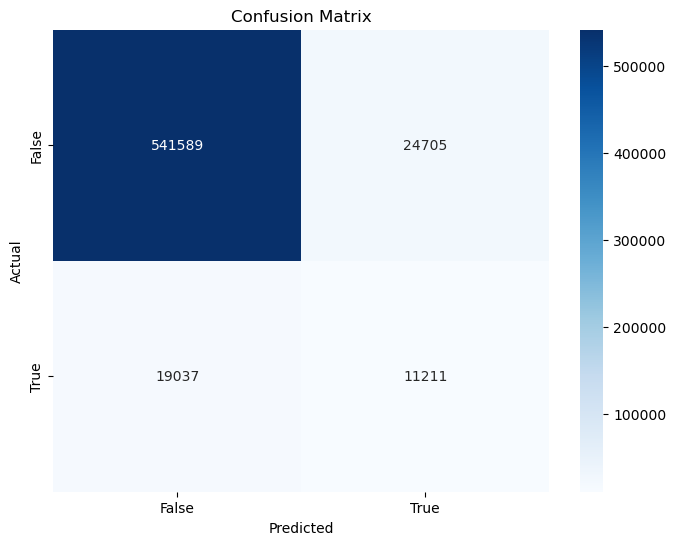

Cross-validated Scores: [0.93592269 0.93785884 0.93610655 0.9157391  0.90774298]
Mean Accuracy: 0.9266740306072933


In [30]:
#Using parameter tuning on decision tree and also using cross validation 
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Perform cross-validated predictions
predicted = cross_val_predict(model, resultDf[features], resultDf['positionOrder'], cv=5)

# Create confusion matrix
conf_mat = confusion_matrix(resultDf['positionOrder'], predicted)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print accuracy for each fold
cv_scores = cross_val_score(model, resultDf[features], resultDf['positionOrder'], cv=5)  # 5-fold cross-validation
print("Cross-validated Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())